In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('data/gemstone.csv')

In [26]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [27]:
## No Missing value 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [29]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [30]:
df.drop(labels = ['id'], axis = 1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [31]:
## check for duplicated records 


In [32]:
df.duplicated().sum()

0

In [33]:
# df.drop_duplicates()

In [34]:
## segregate numerical and categorical columns

In [35]:
numerical_columns = df.columns[df.dtypes!='object']

In [36]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [37]:
categorical_columns = df.columns[df.dtypes=='object']

In [38]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [39]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [40]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [41]:
df['cut'].nunique()

5

In [42]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [43]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

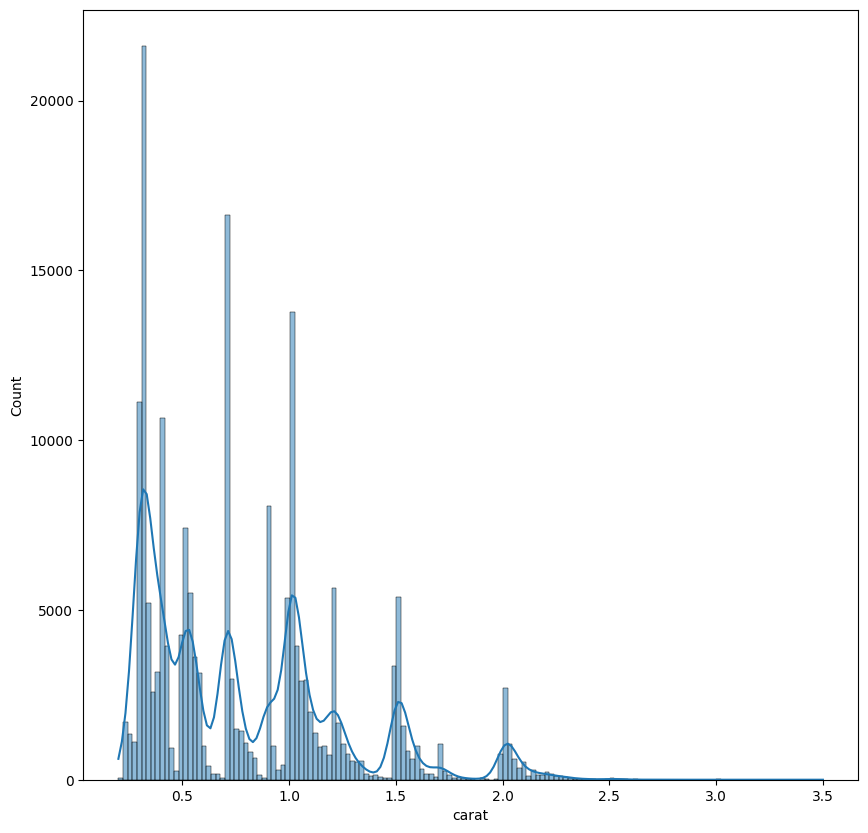

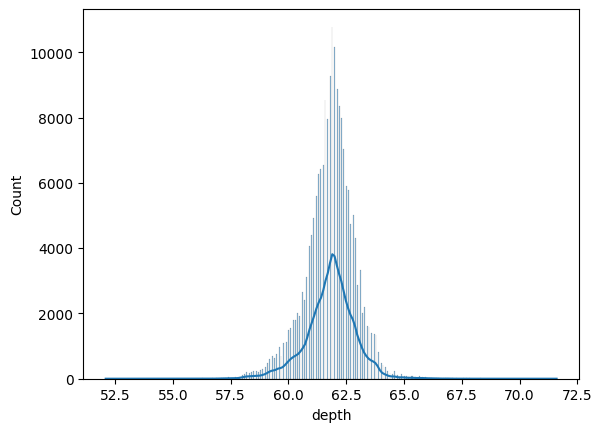

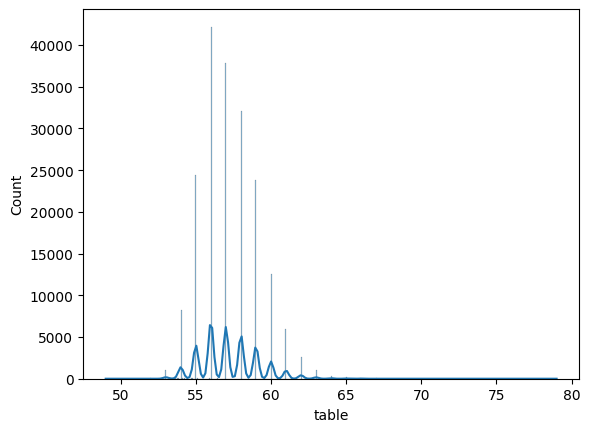

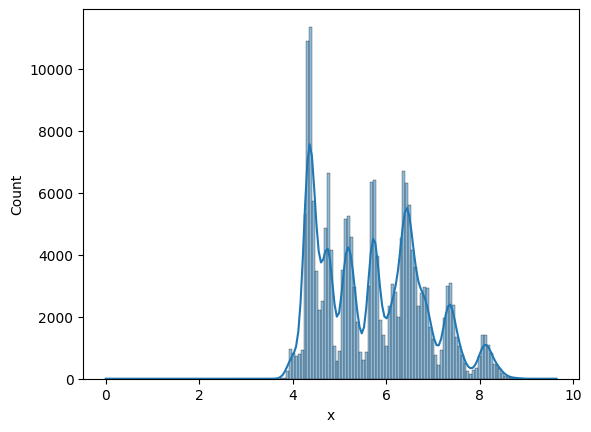

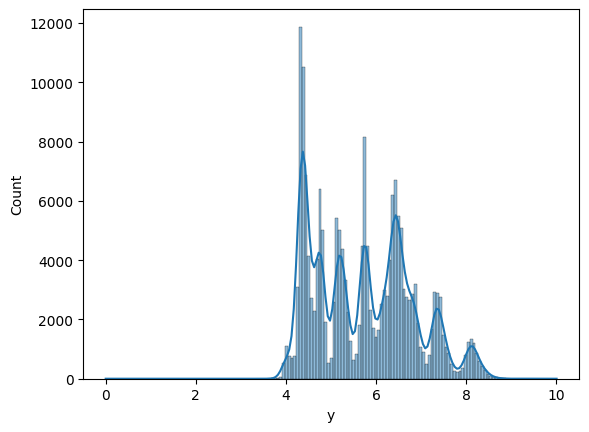

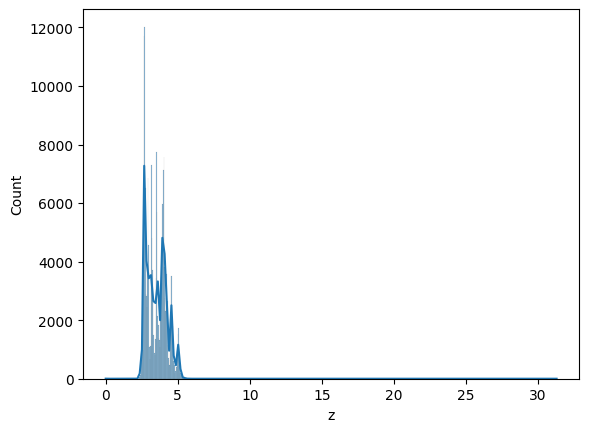

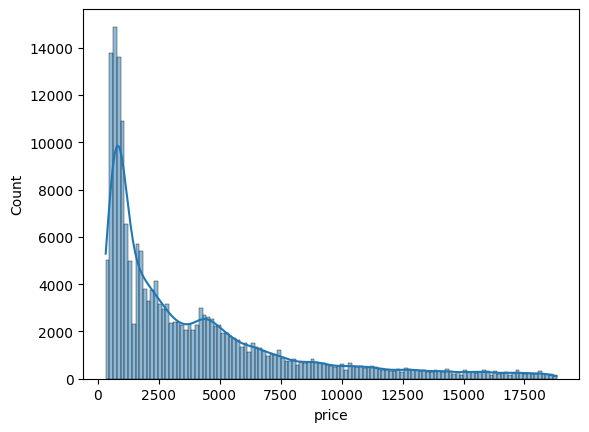

In [44]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in numerical_columns: 
    sns.histplot(data = df, x = i, kde = True)
    # sns.displot(data = df, x = i, kde = True)
    print('\n')
    plt.show()

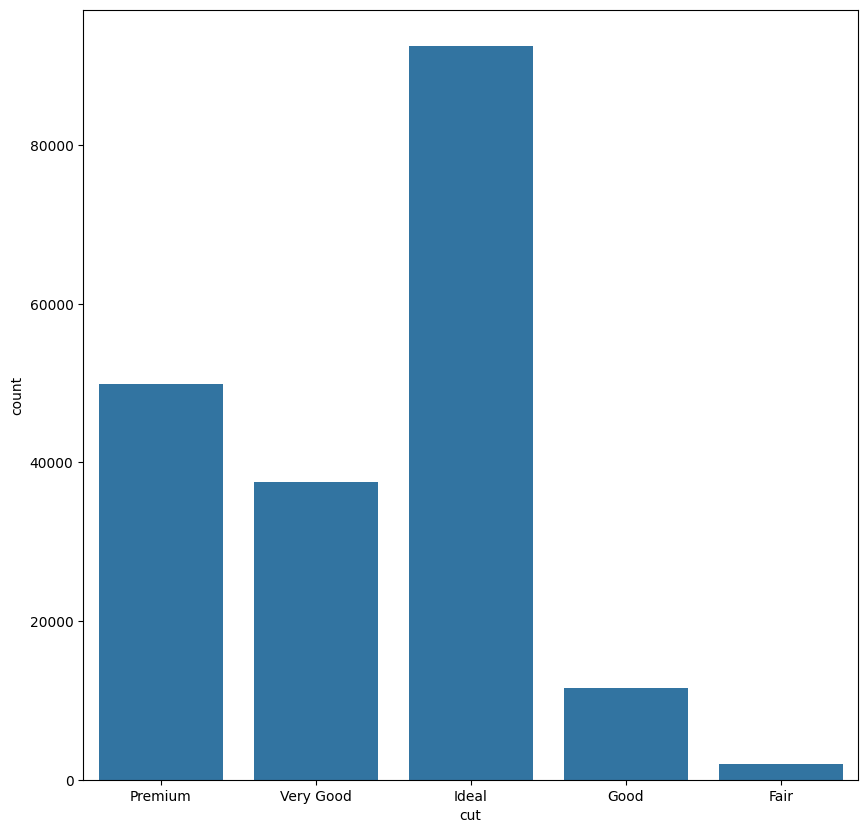

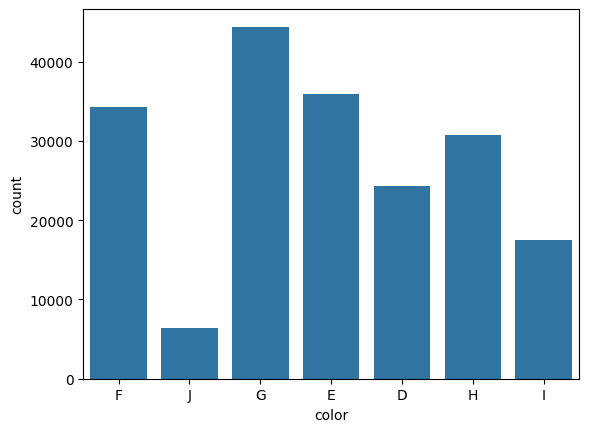

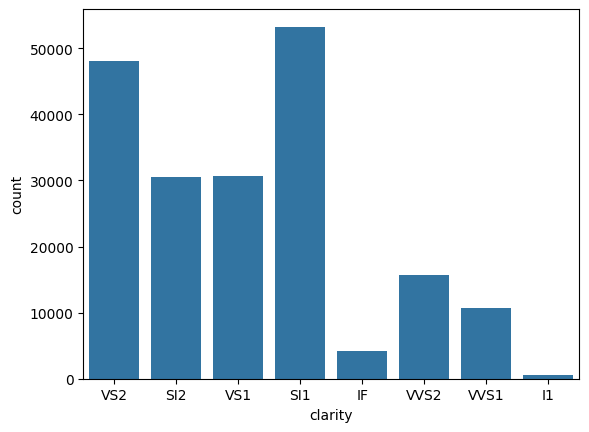

In [48]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in categorical_columns: 
    # sns.histplot(data = df, x = i, kde = True)
    # sns.displot(data = df, x = i, kde = True)
    sns.countplot(data = df, x = i)
    print('\n')
    plt.show()

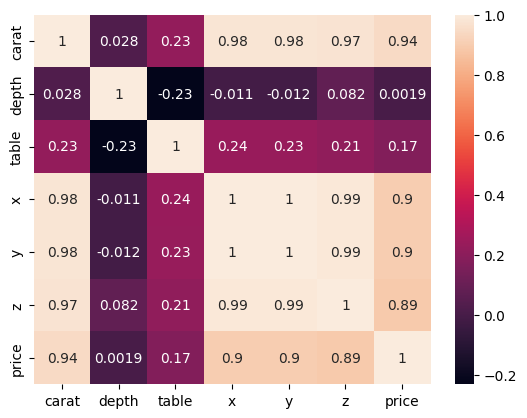

In [49]:
## correlation
sns.heatmap(df[numerical_columns].corr(), annot = True)
plt.show()

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
def get_vif_factor( X ): 
    vif = [ variance_inflation_factor( X, i ) for i in range( X.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif 
    return vif_factors 
vif_factors = get_vif_factor( df[numerical_columns] )
vif_factors[vif_factors.VIF > 4].column.sort_values(ascending=False)

5        z
4        y
3        x
2    table
6    price
1    depth
0    carat
Name: column, dtype: object

In [52]:
get_vif_factor(df[numerical_columns].drop(['x', 'y', 'z'], axis = 1))

,column,VIF
0,carat,36.555057
1,depth,597.342411
2,table,615.054864
3,price,18.086580


In [66]:
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.model_selection import RepeatedKFold

In [59]:
lsso_df = df[numerical_columns].drop('price', axis = 1)

In [62]:
lsso_df

,carat,depth,table,x,y,z
0,1.52,62.2,58.0,7.27,7.33,4.55
1,2.03,62.0,58.0,8.06,8.12,5.05
2,0.70,61.2,57.0,5.69,5.73,3.50
3,0.32,61.6,56.0,4.38,4.41,2.71
4,1.70,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67
193569,0.70,60.3,58.0,5.75,5.77,3.47
193570,0.73,63.1,57.0,5.72,5.75,3.62
193571,0.34,62.9,55.0,4.45,4.49,2.81


In [60]:
lambdas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [69]:
df.drop(labels=['x', 'y', 'z'], axis = 1)

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453
...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,681


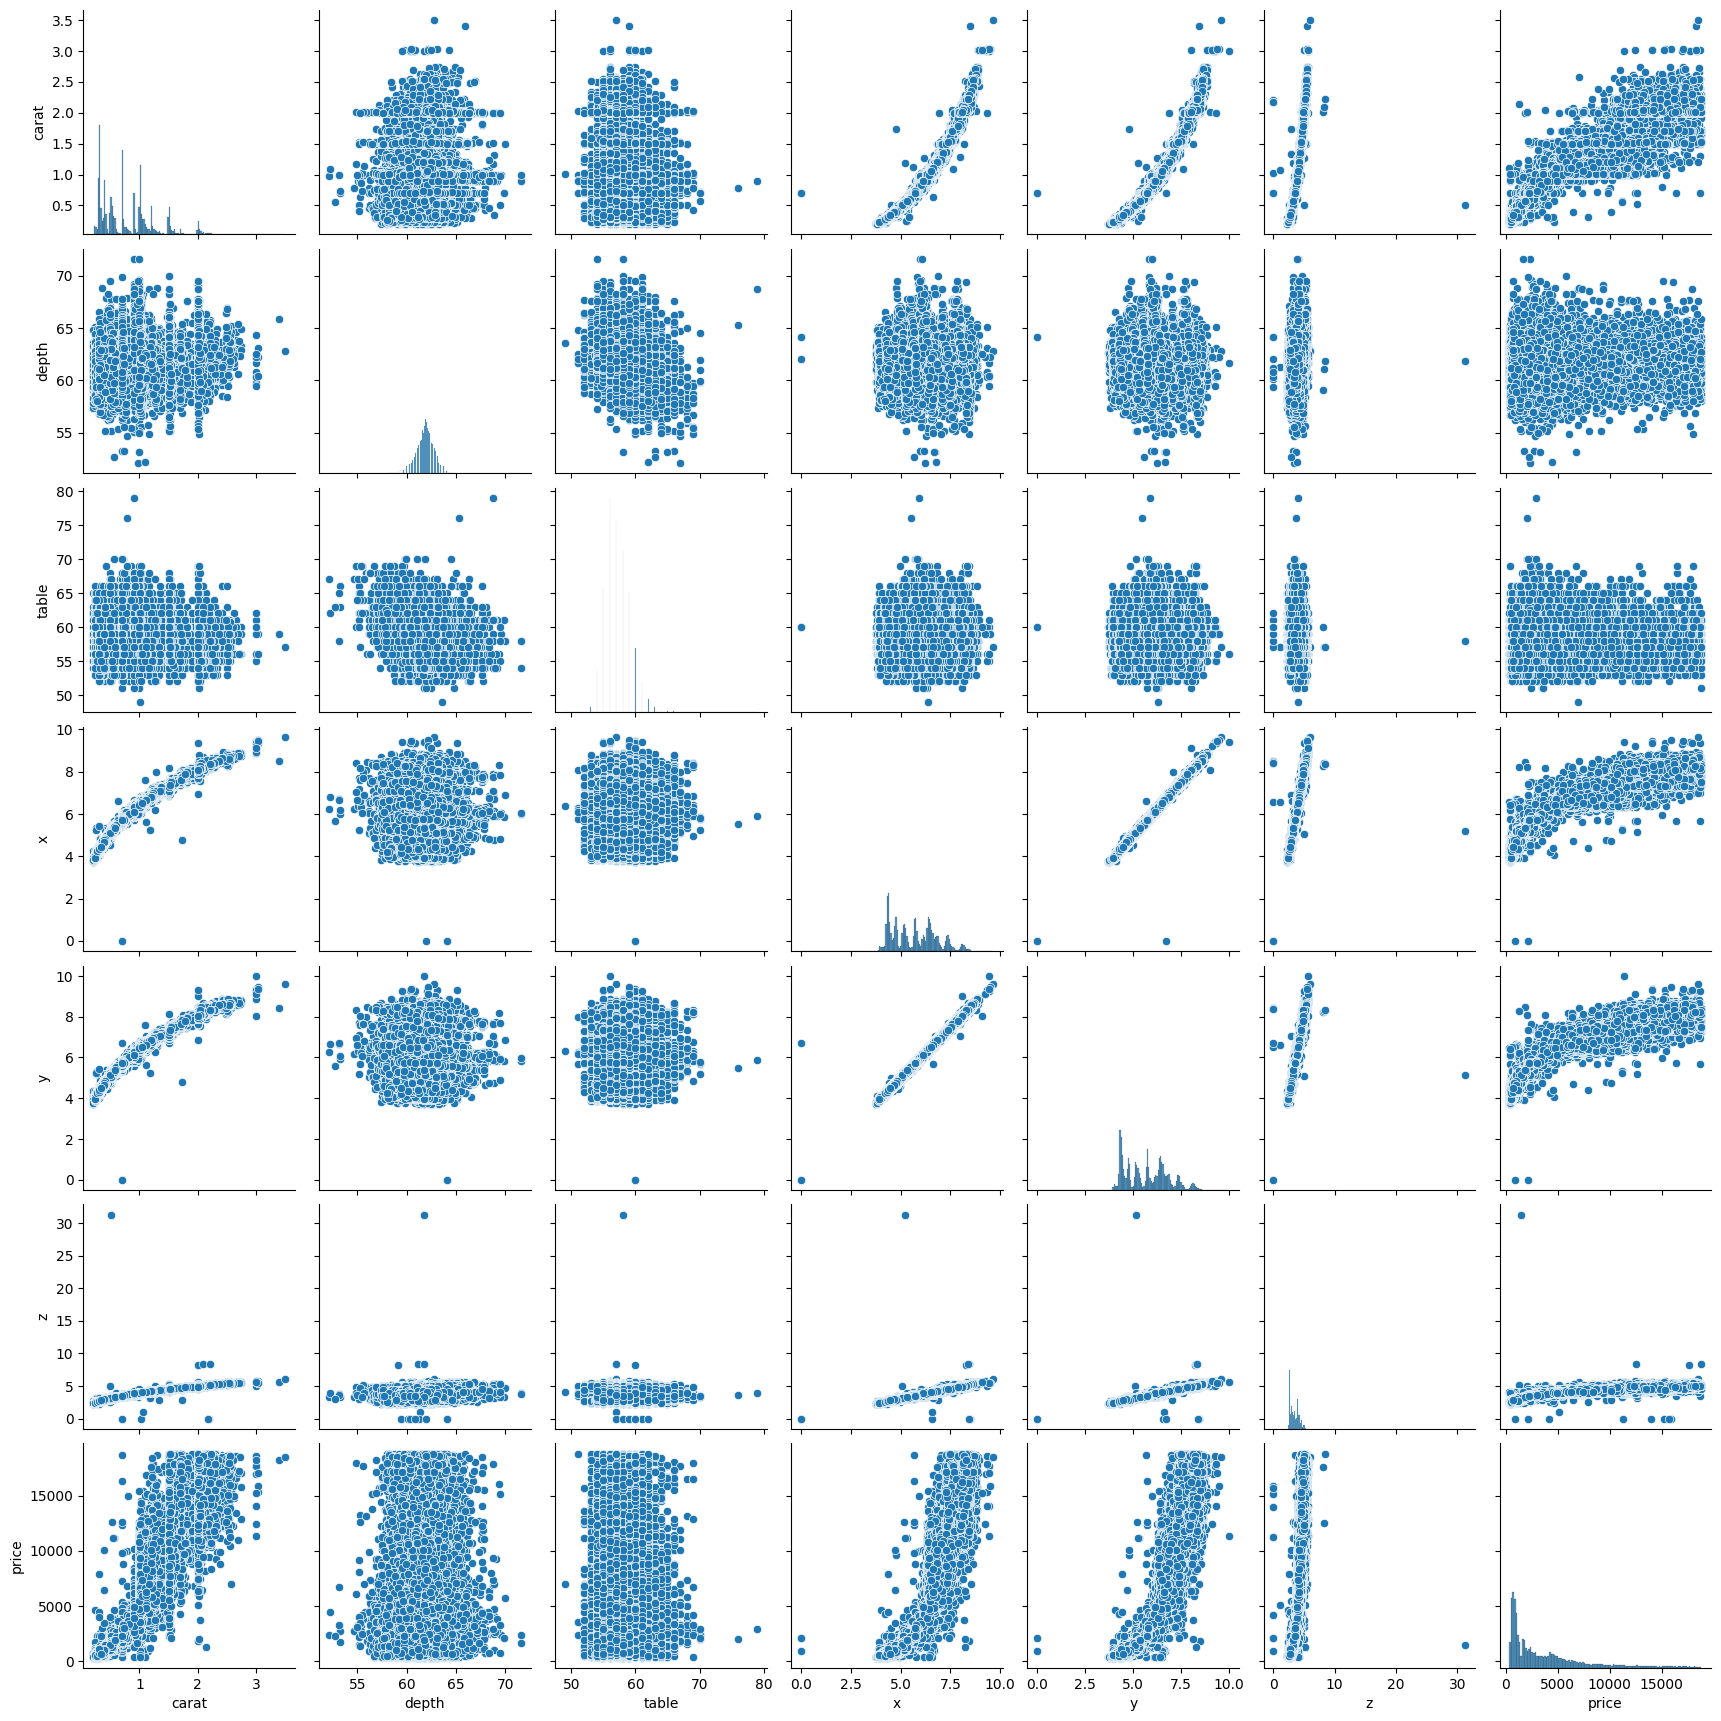

In [70]:
sns.pairplot(df)

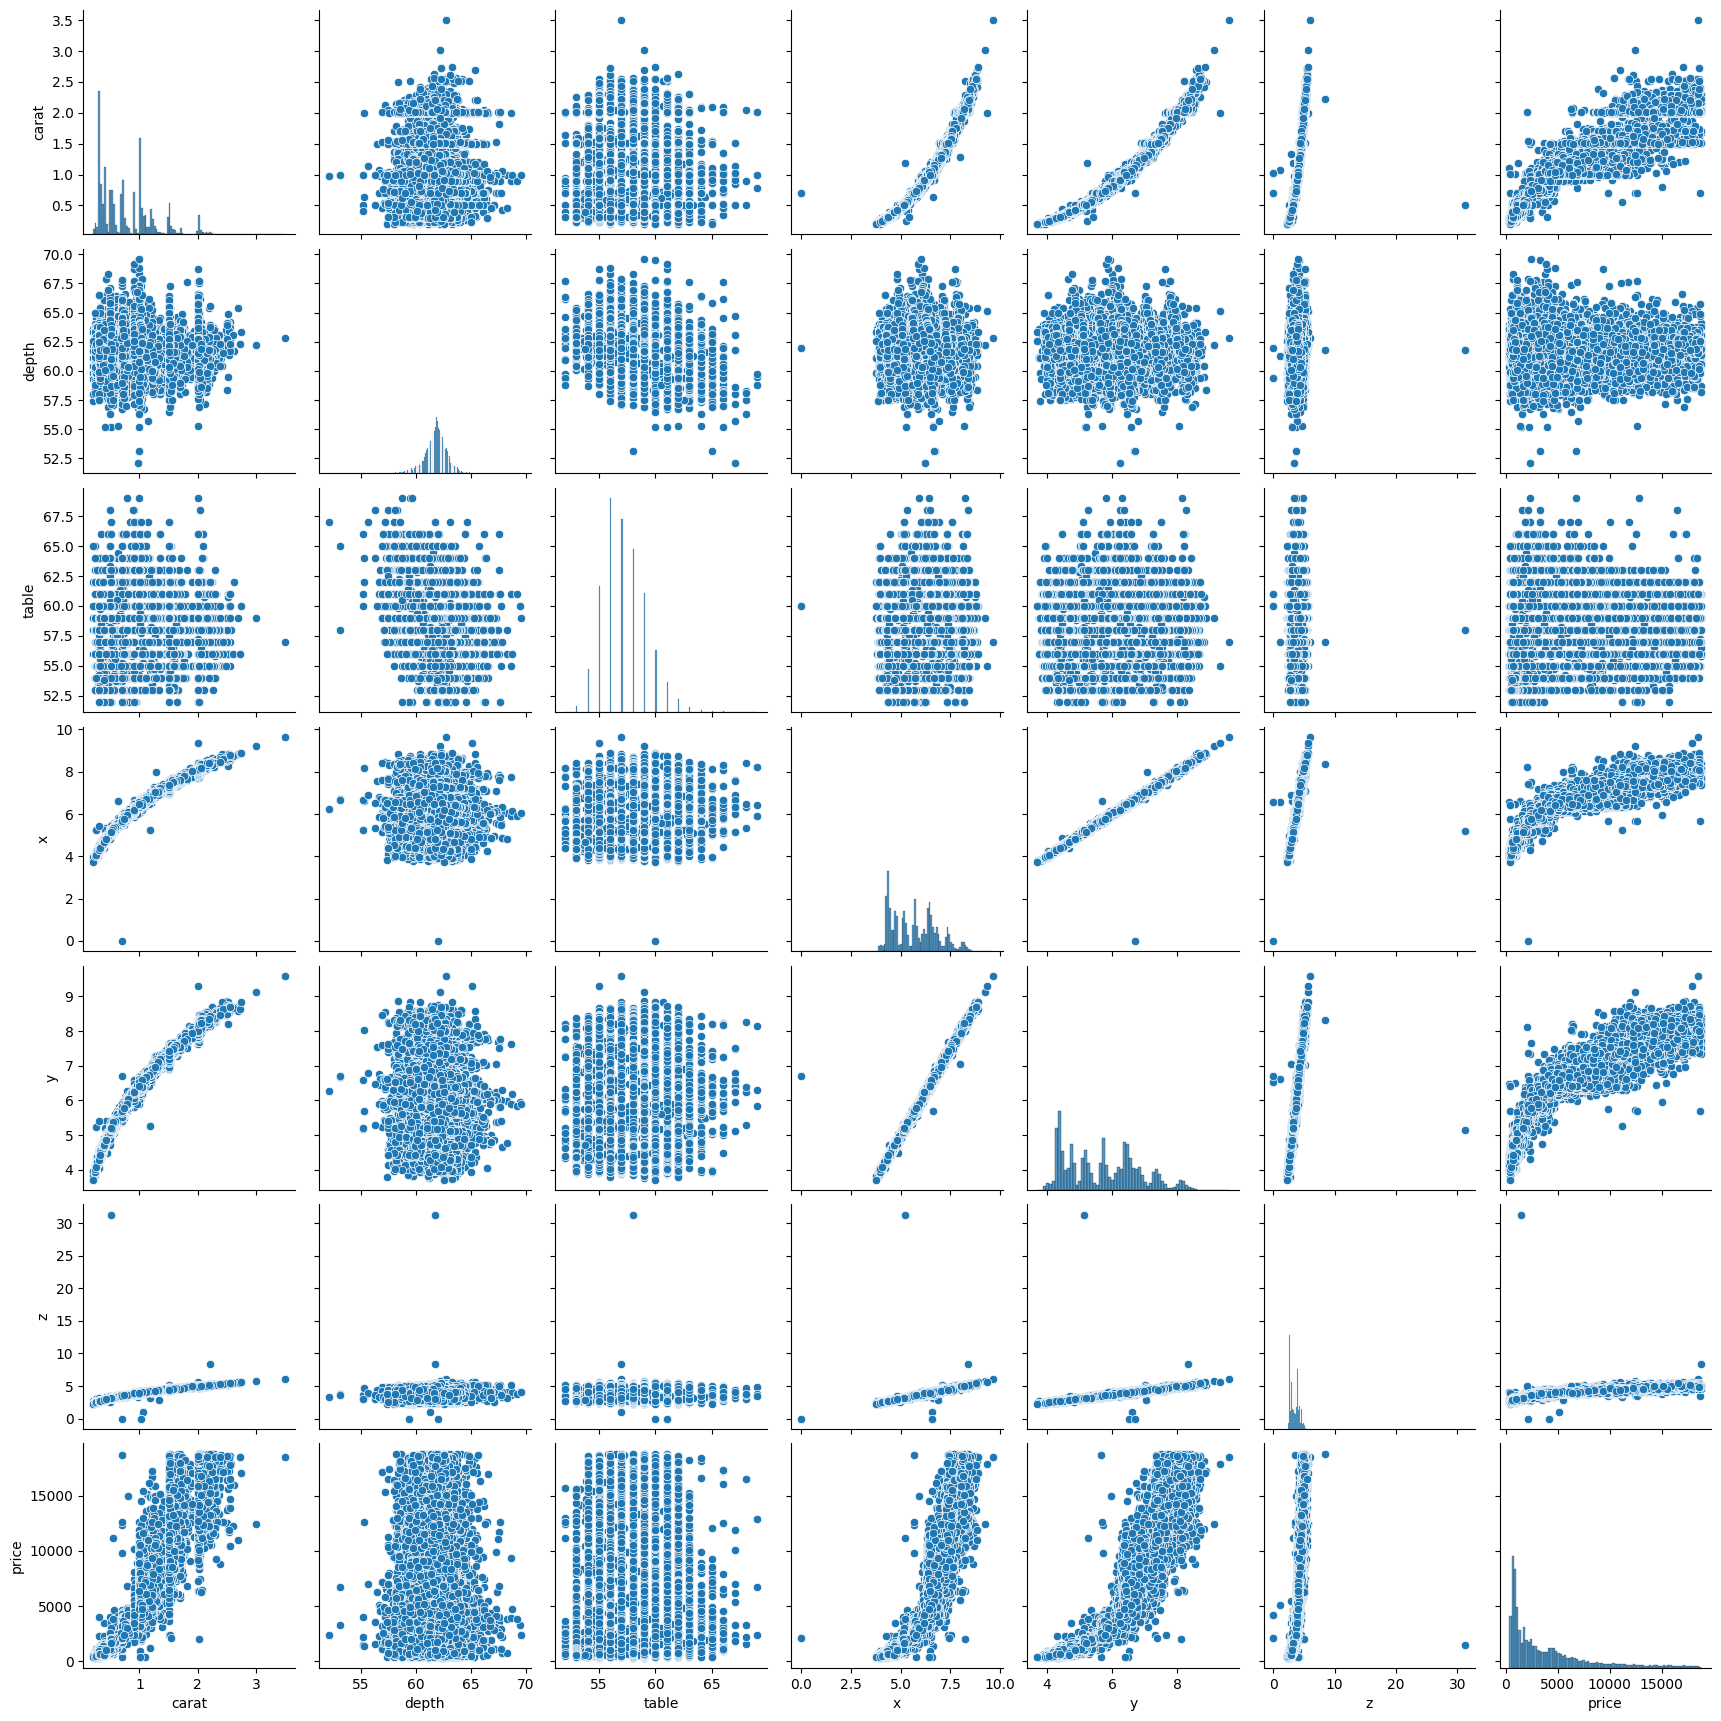

In [76]:
sns.pairplot(df.sample(frac = 0.33, replace = True))

In [77]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [78]:
cut_price = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

In [79]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [80]:
clarity_map = {'l1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8} 

In [82]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [83]:
color_map = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}

In [87]:
df['cut'] = df['cut'].replace(cut_price) # map or apply function can used.

In [88]:
df['clarity'] = df['clarity'].replace(clarity_map)

In [89]:
df['color'] = df['color'].map(color_map)

In [90]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681


In [91]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
